<a href="https://colab.research.google.com/github/vsoos/CloudComputing/blob/main/ex5/5_notebook2_cpu/5_2_cpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow
!pip install -q keras
!pip install -q colorama

In [ ]:
import json
import os
import numpy as np
import colorama
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder

import colorama
colorama.init()
from colorama import Fore, Style, Back

import random
import pickle

In [ ]:
folder_path = '/content/drive/MyDrive/cloudcomputing2023_VincenzinaSoos/ex5/5_notebook2_cpu'
os.chdir(folder_path)

In [ ]:
with open('data/intents.json') as file:
    data = json.load(file)

training_sentences = []
training_labels = []
labels = []
responses = []


for intent in data['intents']:
    for pattern in intent['patterns']:
        training_sentences.append(pattern)
        training_labels.append(intent['tag'])
    responses.append(intent['responses'])

    if intent['tag'] not in labels:
        labels.append(intent['tag'])

num_classes = len(labels)

In [ ]:
lbl_encoder = LabelEncoder()
lbl_encoder.fit(training_labels)
training_labels = lbl_encoder.transform(training_labels)

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = tf.keras.utils.pad_sequences(sequences, truncating='post', maxlen=max_len)
early_stopping = keras.callbacks.EarlyStopping(monitor='loss', patience=13)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(max_len,)))
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)             │ (None, 20, 16)              │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_17          │ (None, 16)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 8)                   │             136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,680 (65.16 KB)

 Trainable params: 16,680 (65.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 1000
history = model.fit(padded_sequences, np.array(training_labels), epochs=epochs, callbacks=[early_stopping])

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.0919 - loss: 2.0803
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1837 - loss: 2.0784
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1427 - loss: 2.0786
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1531 - loss: 2.0781
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1531 - loss: 2.0777
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1531 - loss: 2.0770 
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.1531 - loss: 2.0765
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1427 - loss: 2.0759
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.1531 - loss: 2.0750
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1531 - loss: 2.0745
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1531 - loss: 2.0747
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy

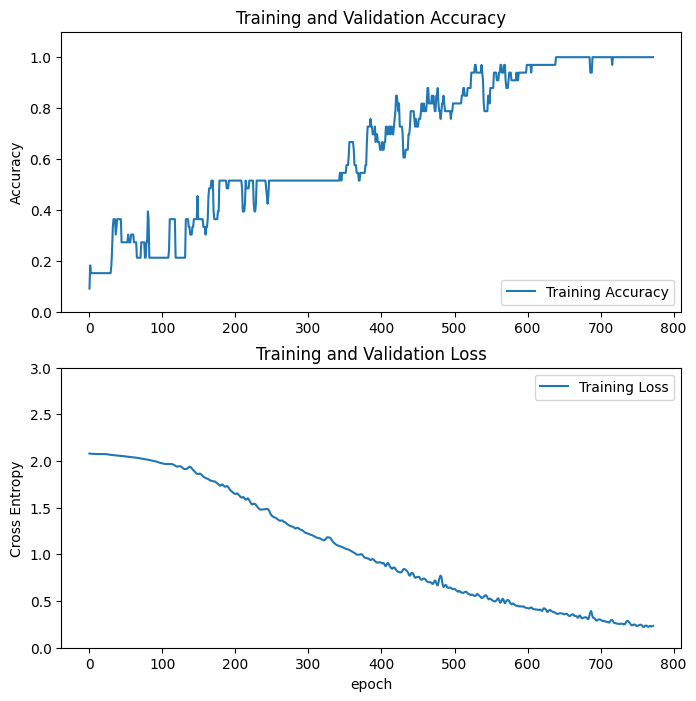

In [ ]:
import matplotlib.pyplot as plt
# visualize training_accuracy, training_loss, val_accuracy and val_loss
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1.1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
# plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,3.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# to save the trained model
model.save("models/chat_model_1_773.h5")

In [ ]:
import pickle

# to save the fitted tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# to save the fitted label encoder
with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# disable TensorFlow warning messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
with open('data/intents.json') as file:
    data = json.load(file)

In [ ]:
def chat():
    unsure_text = "I'm sorry, unfortunately I don't have the answer for your question."

    # load trained model
    model = keras.models.load_model('models/chat_model_1_773.h5')

    # load tokenizer object
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # load label encoder object
    with open('label_encoder.pickle', 'rb') as enc:
        lbl_encoder = pickle.load(enc)

    # parameters
    # max_len = 20

    while True:
        print(Fore.LIGHTBLUE_EX + "User: " + Style.RESET_ALL, end="")
        inp = input()
        if inp.lower() == "quit":
            break

        result = model.predict(tf.keras.utils.pad_sequences(tokenizer.texts_to_sequences([inp]),
                                             truncating='post', maxlen=max_len), verbose=0)

        # this boolean indicates if the bot is unsure of the answer
        unsure = False

        # threshold is 85% -> under that, bot is unsure
        # when we have more questions, we might need
        # to adjust this lower (because there's more room for errors)
        if np.amax(result) < 0.70:
          unsure = True

        if not unsure:
          tag = lbl_encoder.inverse_transform([np.argmax(result)])

          for i in data['intents']:
              if i['tag'] == tag:
                  print(Fore.GREEN + "Rodriquez AI:" + Style.RESET_ALL , np.random.choice(i['responses']))
        else:
          print(Fore.GREEN + "Rodriquez AI:" + Style.RESET_ALL , unsure_text)

        # print(Fore.GREEN + "ChatBot:" + Style.RESET_ALL,random.choice(responses))

In [ ]:
print(Fore.YELLOW + "Start messaging with the bot (type quit to stop)!" + Style.RESET_ALL)
chat()

Start messaging with the bot (type quit to stop)!


User: Hi
Rodriquez AI: Hi there
User: Who are you
Rodriquez AI: I.m Joana, your bot assistant
User: Could you help me?
Rodriquez AI: Yes Sure, How can I support you
User: I need to create a new account
Rodriquez AI: You can just easily create a new account from our web site
User: Bye
Rodriquez AI: I'm sorry, unfortunately I don't have the answer for your question.
User: quit
